# Supplementary Information for:  
# Physiological mismatches between life-history traits shape the temperature dependence of arthropod fitness

<a class="tocSkip">

In [261]:
#Load some modules etc
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault) # Reset plots to default style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = 'true'
plt.rcParams['grid.alpha'] = .45
plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

from sympy import *
import scipy as sc
import numpy as np
init_printing()
%matplotlib inline

## Model for temperature dependence of arthropod population fitness

In age-structured populations, the expected reproductive success of an individual can be described using the continuous form of the Euler-Lotka equation:
$$
	\int\limits_{\alpha}^\infty \mathrm{e}^{-r_m x}l_{x}b_{x}\, \mathrm{d}x = 1
$$
where $r_m$ is the maximal population growth rate, $a$ is the age of first reproduction, $l_x$ is the age-specific survivorship, and $b_x$ is the age-specific fecundity. Solving this equation gives $r_m$ as a function of life-history parameters (the life-history traits).

In [262]:
x, l_a, b_max, alpha, z, z_J, kappa, T, M_0, K, t = var('x l_a b_max alpha z z_J kappa T M_0 K t',real=True, positive = true) #assign symbolic variables

r_m  = var('r_m', real = True) # r_m can be negative

Because a Type III survivorship curve within life stages (which assumes a constant mortality rate) is a resonable approximation for arthropods ([Amarasekare and Savage, 2012](http://www.ncbi.nlm.nih.gov/pubmed/22218308)), given an instantaneous mortality rate, $z$, age-specific survivorship, $l_x$, declines exponentially with age and can be modeled as:

\begin{equation} 
	l_x = l_{\alpha}\mathrm{e}^{-z(x-\alpha)}
\end{equation}

Here, $l_\alpha$ is the proportion of eggs surviving to adulthood (age $\alpha$), which, assuming a fixed instantaneous mortality rate across all juvenile stage, $z_J$, can be modelled as:
\begin{equation}
	l_\alpha = \mathrm{e}^{-\int\limits_0^\alpha z_J\, \mathrm{d}x} = 
	\mathrm{e}^{-z_J \alpha}
\end{equation}

In [263]:
l_a = exp(-integrate(z_J,(x,0,alpha))); l_a

This, when substituted into the $l_x$ equation then gives

\begin{equation}
	l_x = \mathrm{e}^{-(z_J \alpha + z(x-\alpha))}
\end{equation}

<!-- This model can be easily adapted for a variable mortality rate, for example due to senescence, often modelled using a gompertz equation. -->

In [264]:
l_x = l_a * exp(-z*(x - alpha)); simplify(l_x)

(where $x \ge \alpha $).

Next, age-specific fecundity $b_x$ is expected to reach a peak, $b_{max}$, shortly after maturation and then decline gradually with age. We model this using an exponential function
$$
	b_{x} = b_{max} \mathrm{e}^{\kappa \left(\alpha - x\right)}
$$

where we assume that fecundity peaks at the age of first reproduction, which occurs immediately at the time of adult emergence ($\alpha$), and $\kappa$ is a shape parameter (the fecundity loss rate in day$^{-1}$) that controls the spread of the fecundity schedule, that is, the rate of decline in fecundity after its peak. It is also possible that there is a systematic temperature-dependence of the delay between $\alpha$ and the age of peak fecundity. This can be modelled using a shifted exponential or gompertz equation, but is outside the scope of the current study. The figures below show the shape of the $b_x$ model.

In [265]:
b_x = b_max * exp(-kappa*(x - alpha)); simplify(b_x)

We can now visualize these functions.

In [266]:
#assign parameter values

z_J_par = .05 #1/day
z_par = .03 #1/day
alp_par = 25. #days
b_max_par = 10. #individuals/(individual * day)
kap_par = .1 #1/day

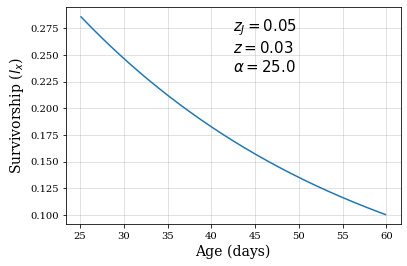

In [267]:
#Numerically evaluate
x_vec = np.arange(0, 60, 0.1) #vector of ages

l_x_lam = lambdify((z_J, z, alpha,x), l_x, np) # Use lambidfy to speed up
l_x_vec = l_x_lam(z_J_par, z_par, alp_par, x_vec[x_vec>alp_par])

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(x_vec[x_vec>alp_par], l_x_vec)
ax.set_xlabel('Age (days)', fontsize=14)
ax.set_ylabel('Survivorship ($l_x$)', fontsize=14)
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(l_x_vec), 
        '$z_J = ' + str(z_J_par)+'$ \n' + 
        '$z = ' + str(z_par)+'$ \n' + 
        r'$\alpha = ' + str(alp_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)

plt.savefig('../results/lxModel.pdf')

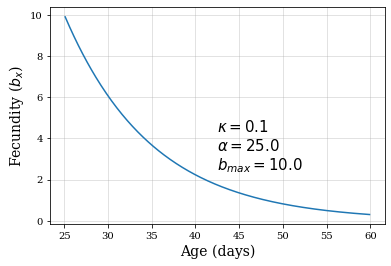

In [268]:
fig = plt.figure(); ax = fig.add_subplot(111)
b_x_lam = lambdify((b_max, kappa, alpha, x), b_x, np) #use lambidy to speed up
b_x_vec = b_x_lam(b_max_par, kap_par, alp_par, x_vec[x_vec>alp_par])

ax.plot(x_vec[x_vec>alp_par], b_x_vec);
ax.set_xlabel('Age (days)', fontsize=14); 
ax.set_ylabel('Fecundity ($b_x$)', fontsize=14)
ax.text(sc.mean(x_vec[x_vec>alp_par]), sc.amax(b_x_vec)/2, 
        r'$\kappa = ' + str(kap_par)+'$ \n'+ 
        r'$\alpha = ' + str(alp_par)+'$ \n' +
        r'$b_{max} = ' + str(b_max_par)+'$ \n',
        horizontalalignment='left', verticalalignment='top', fontsize=15)

plt.savefig('../results/bxModel.pdf')

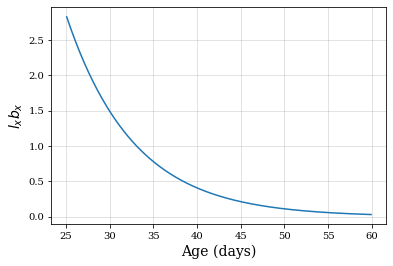

In [269]:
fig = plt.figure(); ax = fig.add_subplot(111) #now plot lxmx

ax.plot(x_vec[x_vec>alp_par], b_x_vec*l_x_vec);
ax.set_xlabel('Age (days)', fontsize=14); 
ax.set_ylabel('$l_x b_x$', fontsize=14)

plt.savefig('../results/lxbxModel.pdf')

Next, substituting the $l_x$ and $b_x$ models into the Euler-Lotka Equation, we get

$$	
\int\limits_{\alpha}^\infty b_{max} \mathrm{e}^{- \alpha z_{J} + \kappa \left(\alpha - x\right) - r x + z \left(\alpha - x\right)}\, \mathrm{d}x = 1
$$

i.e., 
$$
b_{max}\mathrm{e}^{- \alpha z_J} 
\int\limits_{\alpha}^\infty \mathrm{e}^{- r x + (\kappa + z) (\alpha - x)}\, \mathrm{d}x = 1
$$

In [270]:
EuLo = exp(-r_m * x) * l_x * b_x; simplify(EuLo)

And evaluating the integral produces after simplification:

\begin{equation}
    \frac{b_{max} e^{- \alpha \left(r + z_{J}\right)}}{\kappa + r + z} = 1
\end{equation}

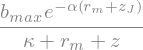

In [271]:
# Integrate EuLo (sagemath used to integrate(EuLo, x, alpha, infinity), with positivity constraints on all parameters), which gives:
EuLo_int = b_max*exp(-alpha*z_J)/((kappa + r_m)*exp(alpha*r_m) + z*exp(alpha*r_m)); simplify(EuLo_int)

Solving this for $r_m$ gives:

\begin{equation}
r_m = \frac{1}{\alpha} \left(- \alpha (\kappa + z) + \operatorname{LambertW}{\left(\alpha b_{max} e^{\alpha \left(\kappa + z - z_{J}\right)} \right)}\right)
\end{equation}

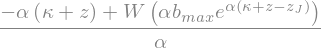

In [272]:
r_SP = solve(EuLo_int-1,r_m); r_SP = simplify(r_SP[0]); r_SP

The LambertW function part is difficult to use for parameter sensitivity analyses (and also hard to interpret). An approximation for its main (real) branch can be found, but it involves a double logarithm, which still results in divergence of certain analyses (below). Therefore instead, we directly derive an approximation to the solution of the integral above, as follows. 

First, we take a log of both sides of the equation:

\begin{equation}
    \log(b_{max}) - \alpha (r + z_J) - \log(\kappa + r + z) = 0
\end{equation}

As such, this equation still cannot be solved for $r_m$ because of the term $\mathrm{ln}(\kappa + r + z)$. But we can approximate just this term by performing a power series expansion of it around $r_m = 0$:

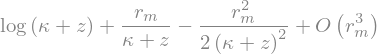

In [273]:
series(ln(r_m + kappa + z),r_m, 0,3)

That is, 

$$
 \frac{b_{max} e^{- \alpha z_{J}}}{z e^{\alpha r_{m}} + \left(\kappa + r_{m}\right) e^{\alpha r_{m}}}
 \approx \log{\left (\kappa + z \right )} + \frac{r_{m}}{\kappa + z} - \frac{r_{m}^{2}}{2 \kappa^{2} + 4 \kappa z + 2 z^{2}} + \mathcal{O}\left(r_{m}^{3}\right)
$$

Then, substituting the first two terms back into the integral solution and solving for $r_m$ gives:

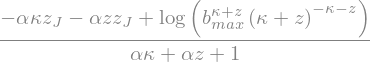

In [274]:
EuLo_int_app = b_max*exp(-alpha*(r_m + z_J))/ exp(log(kappa + z) + r_m/(kappa + z))

r_SP_app = solve(EuLo_int_app-1, r_m); r_SP_app = simplify(r_SP_app[0]); r_SP_app

Thus the approximation is: 

$$
	r_m \approx \frac{-\alpha \kappa z_J - \alpha z z_J + \kappa \log{\left (\frac{b_{max}}{\kappa + z} \right )} + z \log{\left (\frac{b_{max}}{\kappa + z} \right )}}{\alpha (\kappa + z) + 1}  
$$

that is, 

$$r_m \approx \frac{(\kappa + z)  \left( \log\left(\frac{b_{max}}{\kappa + z} \right) - \alpha z_J\right)}{\alpha (\kappa + z) + 1} $$

The figures below show that this approximation is very good as long as $r_m$ is relatively small (approx. $<0.5$). This range of $r_m$ values is typically where maximal growth rates of arthropods typically lie ([Frazier et al 2006](https://www.journals.uchicago.edu/doi/full/10.1086/506977)).

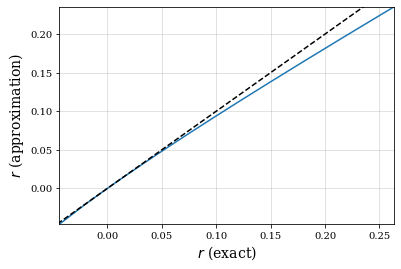

In [275]:
from scipy.special import lambertw

bmax_vec = np.arange(.1, 1000, 0.1).astype(float) #vector of b_max's

#use lambidy to speed up:
r_SP_app_lam = lambdify((b_max, z_J, z, kappa, alpha), r_SP_app, np)
r_SP_app_vec = r_SP_app_lam(bmax_vec, z_J_par, z_par, kap_par, alp_par)

# Specify r_SP with lambertw:
tmp = lambertw((alp_par*bmax_vec*exp(alp_par*(kap_par + z_par - z_J_par))).astype('float')).real
r_SP_vec = -(kap_par + z_par) + tmp/alp_par

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_app_vec)
ax.plot(np.arange(-1,5,0.1), np.arange(-1,5,0.1), "k--")
ax.set_xlim([min(r_SP_vec),max(r_SP_vec)])
ax.set_ylim([min(r_SP_app_vec),max(r_SP_app_vec)])
ax.set_xlabel('$r$ (exact)', fontsize=14); 
ax.set_ylabel('$r$ (approximation)', fontsize=14)

plt.savefig('../results/rapprox0.pdf')

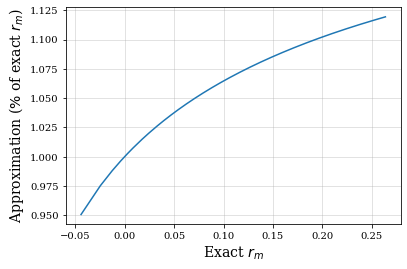

In [276]:
fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(r_SP_vec, r_SP_vec/r_SP_app_vec)
ax.set_xlabel('Exact $r_m$', fontsize=14) 
ax.set_ylabel(r'Approximation ($\%$ of exact $r_m$)', fontsize=14)

plt.savefig('../results/rapprox1.pdf')

The parameters underlying ($r_m$) fitness and their units are summarized in the following table:

| **Parameter**| **Units** | **Description** |
|-------------|-----------|-----------------|
| $a$ | day | Age of maturation (egg to adult development time)|
|$b_{max}$ | individuals (eggs) $\times$ individual (female) $\times$ day $^{-1}$ , i.e., day$^{-1}$ | Maximum fecundity (reproductive rate)|
|$z$ | day$^{-1}$ | Adult mortality rate |
|$z_J$ | day$^{-1}$ | Mortality rate across all juvenile stages |
|$\kappa$ | day$^{-1}$ | Fecundity loss rate|


## Temperature-dependence of life history parameters 

We described the thermal performance curve for each life history parameter using the Sharpe-Schoolfield model, or its inverse: 

In [277]:
# Assign functions
B_0, E, E_D, T_pk, k, T, T_ref = var('B_0 E E_D T_pk k T T_ref')

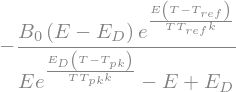

In [278]:
B = B_0 * exp(-E * ((1/(k*(T))) - (1/(k*T_ref)))) /(1 + (E / (E_D - E)) * exp((E_D / k)* ((1/T_pk) - (1/T)))); simplify(B)

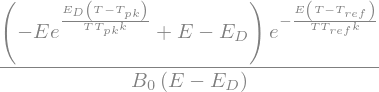

In [279]:
B_inv = simplify(1/B); B_inv

The Sharpe-Schoolfield model provides a mechanistic, thermodynamic basis for the thermal performance curves of biological traits/rates, including the hotter is better pattern.

In [280]:
# Assign generic parameter values
k_par = 8.617 * 10**-5
E_par = .65
E_D_par = 4
T_pk_par = 20
T_ref_par = 10+273.15
B_0_par = 0.5

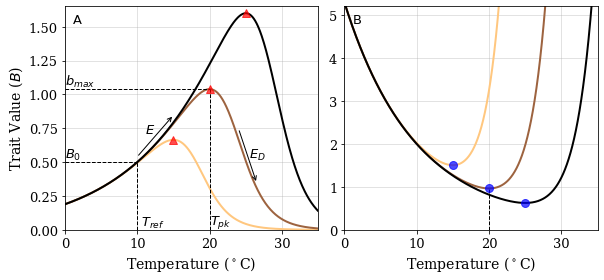

In [281]:
T_vec = 273.15+np.arange(0, 35, 0.05) #Vector of temperatures

B_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B, np) 
B_vec0 = B_lam(B_0_par,E_par,T_pk_par-5+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_vec1 = B_lam(B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_vec2 = B_lam(B_0_par,E_par,T_pk_par+5+273.15,T_ref_par,E_D_par,k_par,T_vec)

B_inv_lam = lambdify((B_0, E, T_pk, T_ref, E_D,k,T), B_inv, np)
B_inv_vec0 = B_inv_lam(B_0_par,E_par,T_pk_par-5+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_inv_vec1 = B_inv_lam(B_0_par,E_par,T_pk_par+273.15,T_ref_par,E_D_par,k_par,T_vec)
B_inv_vec2 = B_inv_lam(B_0_par,E_par,T_pk_par+5+273.15,T_ref_par,E_D_par,k_par,T_vec)

fig = plt.figure(figsize=(8.5, 4)); ax = fig.add_subplot(121)

cm = plt.cm.copper_r(np.linspace(0, 1, 3))
ax.set_prop_cycle('color',cm)

ax.plot(T_vec-273.15, B_vec0, linewidth=2) 
ax.plot(T_vec-273.15, B_vec1, linewidth=2) 
ax.plot(T_vec-273.15, B_vec2, linewidth=2)

ax.annotate(s='', xy=(T_vec[200]-273.15,B_vec1[200]*1.08), xytext=(T_vec[300]-273.15,B_vec1[300]*1.08), arrowprops=dict(arrowstyle='<-'))
ax.text(T_vec[250]-273.15, B_vec1[250]*1.1, '$E$', horizontalalignment='right', verticalalignment='bottom', fontsize=13)

ax.annotate(s='', xy=(T_vec[480]-273.15,B_vec1[480]*1.12), xytext=(T_vec[530]-273.15,B_vec1[530]*1.12), arrowprops=dict(arrowstyle='<-'))
ax.text(T_vec[510]-273.15, B_vec1[510]*1.15, '$E_D$', horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([T_pk_par, T_pk_par], [0,max(B_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(T_pk_par, 0, '$T_{pk}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,T_pk_par], [max(B_vec1), max(B_vec1)], color='k', linestyle='--', linewidth=1)
ax.text(0, max(B_vec1), '$b_{max}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

ax.plot([0,10], [B_0_par, B_0_par], color='k', linestyle='--', linewidth=1)
ax.plot([10, 10], [0, B_0_par], color='k', linestyle='--', linewidth=1)
ax.text(0, B_0_par, '$B_0$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)
ax.text(10, 0, ' $T_{ref}$',  horizontalalignment='left', verticalalignment='bottom', fontsize=13)

plt.plot(T_pk_par-5, max(B_vec0), marker='^', markersize=8, color="red",alpha = 0.7)
plt.plot(T_pk_par, max(B_vec1), marker='^', markersize=8, color="red",alpha = 0.7)
plt.plot(T_pk_par+5, max(B_vec2), marker='^', markersize=8, color="red",alpha = 0.7)

csfont = {'fontname':'DejaVu Sans'}

ax.set_title('A', fontsize=13, x=.05, y=.9,**csfont); 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('Trait Value ($B$)', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
ax.set_xlim(0,35); ax.set_ylim(0,1.65);

ax = fig.add_subplot(122)
ax.set_prop_cycle('color',cm)
ax.plot(T_vec-273.15, B_inv_vec0, linewidth=2)
ax.plot(T_vec-273.15, B_inv_vec1, linewidth=2)
ax.plot(T_vec-273.15, B_inv_vec2, linewidth=2)
ax.plot([T_pk_par, T_pk_par], [0,min(B_inv_vec1)], color='k', linestyle='--', linewidth=1)

plt.plot(T_pk_par-5, min(B_inv_vec0), marker='o', markersize=8, color="blue",alpha = 0.7)
plt.plot(T_pk_par, min(B_inv_vec1), marker='o', markersize=8, color="blue",alpha = 0.7)
plt.plot(T_pk_par+5, min(B_inv_vec2), marker='o', markersize=8, color="blue",alpha = 0.7)

ax.set_title('B', fontsize=13, x=.05, y=.9,**csfont); 

ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14);
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
ax.set_xlim(0,35); ax.set_ylim(0,5.2);

fig.tight_layout()

plt.savefig('../results/TPCModel.pdf')

## Thermal Performance Curve (TPC) parameterizations of life history traits

In order to evaluate the model, we use idealised thermal performance curves (TPCs), parametrised to have equal sensitivity to temperature by assigning all traits the same values for thermal optimum ($T_{pk}$), activation energy ($E$) and deactivation energy ($E_D$).

The thermal optimum and activation energy were parametrised as the median values found by Dell *et al.* (2011) in an analysis a database of thermal perfomance curves for different traits across a range of taxa. Due to the small number of studies from which it was possible to estimate the deactivation energy was parametrised included in Dell's *et al.* (2011) analysis, deactivation energy was parametrised from ... (BioTraits database...)

The normalisation constant ($B_0$) was parametrised for each trait in order that the trait value at the thermal optimum is of a scale consistent with empirical observations of these traits in disease vectors. For this, we used the thermal perfomance curves fitted by Mordecai $et al.$ (2013, 2017) for life history traits in mosquitoes. In the absence of appropriate data on the rate of loss of fertility ($\kappa$), we evaluate the model for a range of values (later below).

|**Model parameter** | **Normalization constant ($B_0$)** | **Thermal optimum ($T_{pk}$)** | **Thermal Sensitivity ($E$)** | **Decativation energy ($E_D$)** |
|----------------------|----------------------|----------------------|----------------------|-----------------|
|$\alpha$ | 25 | 25 | 0.6 | 4 |
|$b_{max}$ | 10 | 25 | 0.6 | 4 |
|$z$ | 0.03 | 25 | 0.6 | 4 |
|$z_J$ | 0.05 | 25 | 0.6 | 4 |
|$\kappa$ | 0-1 | 25 | 0.6 | 4 |

The resulting TPCs are plotted below.

In [282]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

#Assign trait-specific TPC values:

B_0_alp =  1/alp_par#days; inverse because we are using inverse of the Sharpe-Schoolfield model
T_pk_alp = 25
E_alp = .6
E_D_alp = 4

B_0_bmax = b_max_par #individuals/(individual * day)
T_pk_bmax = 25
E_bmax = .6
E_D_bmax = 4

B_0_z = 1/z_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_z = 25
E_z = .6
E_D_z = 4

B_0_zJ = 1/z_J_par  #1/day; inverse because we are using inverse of the S-S TPC model
T_pk_zJ = 25
E_zJ = .6
E_D_zJ = 4

B_0_kap = kap_par #1/day
T_pk_kap = 25
E_kap = .6
E_D_kap = 4

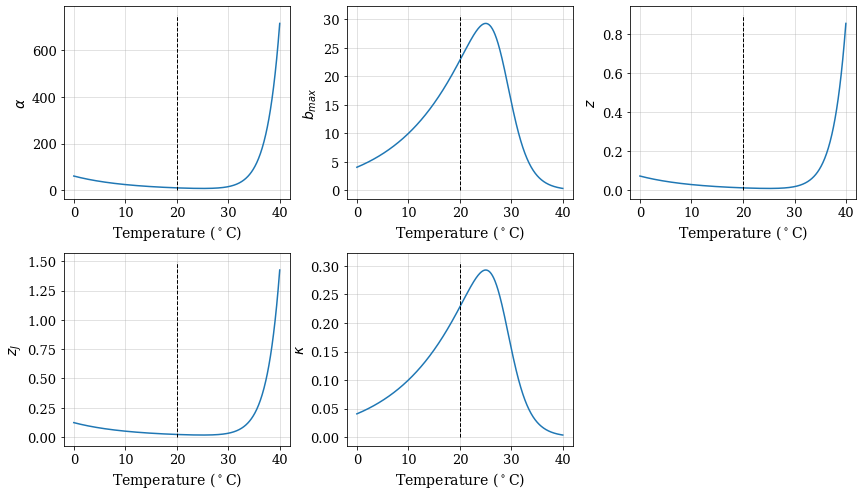

In [283]:
#Calculate the TPCs

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize=(12, 7)); 

ax = fig.add_subplot(231)
ax.plot(T_vec-273.15, alp_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\alpha$', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(232)
ax.plot(T_vec-273.15, bmax_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$b_{max}$', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(233)
ax.plot(T_vec-273.15, z_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$z$', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(234)
ax.plot(T_vec-273.15, zJ_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$z_J$', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

ax = fig.add_subplot(235)
ax.plot(T_vec-273.15, kap_vec);
ax.plot([T_pk_par, T_pk_par], [0,ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);

fig.tight_layout()

plt.savefig('../results/TraitTPCs.pdf')

## Temperature Dependence of $r_m$

To determine the temperature dependence of the vector population growth rate, we substitute the thermal performance curves of the life history traits into the approximation of $r_m$ derived above.


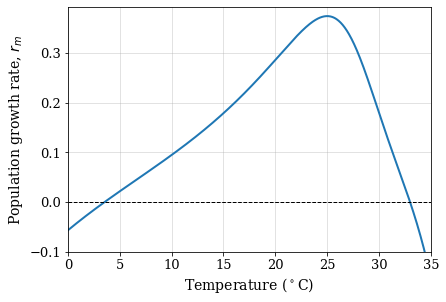

In [284]:
#Calculate r_m

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_vec)

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(T_vec-273.15, r_m_vec, linewidth=2);
ax.plot(T_vec-273.15, [0]*len(T_vec), color='k', linestyle='--', linewidth=1);
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('Population growth rate, $r_m$', fontsize=14)
ax.set_xlim(0,35);
ax.set_ylim(-.1,max(r_m_vec)*(1+0.05));
ax.tick_params(axis='x', labelsize=13);
ax.tick_params(axis='y', labelsize=13);
plt.tight_layout(pad=0)

plt.savefig('../results/r_TPC.pdf')

## Temperature-dependent trait sensitivity analysis

In order to determine the traits driving the sensitivity of the TPC for population growth rate to thermal mismatches between between juvenile and adult traits, we assess the sensitivity of the model to temperature dependence of each parameter.

This can be determined by using the chain rule to determine the relative contribution of the temperature dependence of each parameter to the temperature dependence of population growth rate. The relative contribution of a parameter can be expressed as the product of the partial derivative of population growth rate ($r_m$) with respect to a parameter and the derivative of that parameter with respect to temperature:

\begin{equation}
\frac{\mathrm{d}r_m}{\mathrm{d}T} = 
\frac{\partial r_m}{\partial b_{max}} \frac{\mathrm{d}b_{max}}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial \alpha}\frac{\mathrm{d}\alpha}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial z} \frac{\mathrm{d}z}{\mathrm{d}T} +
\frac{\partial r_m}{\partial z_J} \frac{\mathrm{d}z_J}{\mathrm{d}T} + 
\frac{\partial r_m}{\partial \kappa} \frac{\mathrm{d}\kappa}{\mathrm{d}T} 
\end{equation}

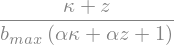

In [285]:
dr_dbmax = diff(r_SP_app, b_max); simplify(dr_dbmax)

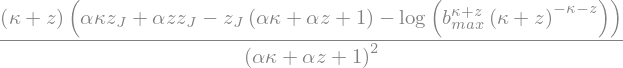

In [286]:
dr_dalp = diff(r_SP_app, alpha); simplify(dr_dalp)

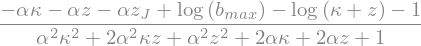

In [287]:
dr_dz = diff(r_SP_app, z); simplify(dr_dz)

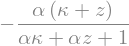

In [288]:
dr_dzJ = diff(r_SP_app, z_J); simplify(dr_dzJ)

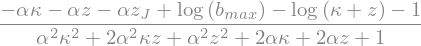

In [289]:
dr_dkap = diff(r_SP_app, kappa); simplify(dr_dkap)

For the TPC model, we ony need to calculate the derivative wrt $T$ for either the function $B$ (for parameters that are rates) or the 1/$B$ (for parameters that are times):

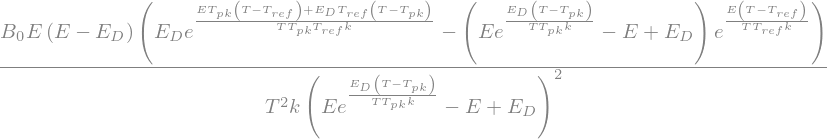

In [290]:
dBdT =  diff(B, T); simplify(dBdT)

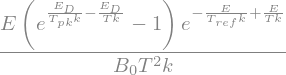

In [291]:
dB_invdT =  diff(B_inv, T); simplify(dB_invdT)

In [292]:
alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_vec)

#Get the lambdified pd functions

dr_dalp_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dalp, np)
dr_dbmax_lam = lambdify((b_max, alpha, z, kappa), dr_dbmax, np)
dr_dz_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dz, np)
dr_dzJ_lam = lambdify((alpha, z, kappa), dr_dzJ, np)
dr_dkap_lam = lambdify((b_max, alpha, z, z_J, kappa), dr_dkap, np)

dalp_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dbmax_dT_lam = lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)
dz_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)   
dzJ_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dB_invdT, np)
dkap_dT_lam =  lambdify((B_0,E,T_pk,T_ref,E_D,k,T), dBdT, np)

# Numerically evaluate

dr_dalp_vec = dr_dalp_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec)
dr_dbmax_vec = dr_dbmax_lam(bmax_vec, alp_vec, z_vec, kap_vec)
dr_dz_vec = dr_dz_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec)
dr_dzJ_vec =  dr_dzJ_lam(alp_vec, z_vec, kap_vec)
dr_dkap_vec = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec)

dalp_dT_vec = dalp_dT_lam (B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
dbmax_dT_vec = dbmax_dT_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
dz_dT_vec =  dz_dT_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)  
dzJ_dT_vec =  dzJ_dT_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
dkap_dT_vec =  dkap_dT_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

# Calculate the parameter sensitivities
 
dr_dalp_dT_vec = dr_dalp_vec * dalp_dT_vec
dr_dbmax_dT_vec = dr_dbmax_vec * dbmax_dT_vec
dr_dz_dT_vec = dr_dz_vec * dz_dT_vec
dr_dzJ_dT_vec = dr_dzJ_vec * dzJ_dT_vec
dr_dkap_dT_vec = dr_dkap_vec * dkap_dT_vec

dr_dT_vec = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec

r_alp_cons_vec = r_SP_app_lam(bmax_vec,zJ_vec, z_vec, kap_vec, alp_par)
r_bmax_cons_vec = r_SP_app_lam(b_max_par,zJ_vec, z_vec, kap_vec, alp_vec)
r_z_cons_vec = r_SP_app_lam(bmax_vec,zJ_vec, z_par, kap_vec, alp_vec)
r_zJ_cons_vec = r_SP_app_lam(bmax_vec,z_J_par, z_vec, kap_vec, alp_vec)
r_kap_cons_vec = r_SP_app_lam(bmax_vec,zJ_vec, z_vec, kap_par, alp_vec)

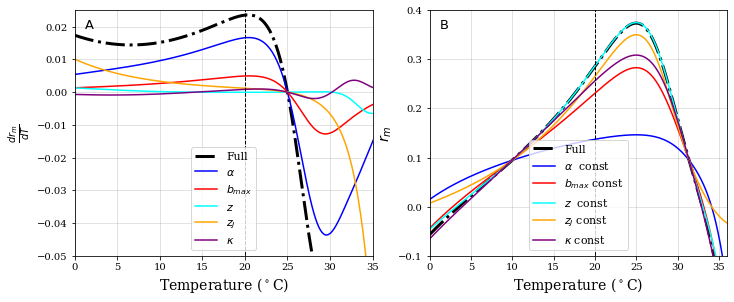

In [293]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title('A', fontsize=13, x=.05, y=.9,**csfont); 

ax.plot(T_vec-273.15,dr_dT_vec, 'black',linewidth=3, linestyle='-.')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.05,0.025])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14);
plt.legend(['Full', r'$\alpha$', '$b_{max}$', '$z$', '$z_J$', r'$\kappa$'], loc='lower center',fontsize=11) 

ax = fig.add_subplot(122)
ax.set_title('B', fontsize=13, x=.05, y=.9,**csfont); 
ax.plot(T_vec-273.15,r_m_vec, 'black',linewidth=3, linestyle='-.');
ax.plot(T_vec-273.15,r_alp_cons_vec, 'blue');
ax.plot(T_vec-273.15,r_bmax_cons_vec, 'red');
ax.plot(T_vec-273.15,r_z_cons_vec, 'cyan');
ax.plot(T_vec-273.15,r_zJ_cons_vec, 'orange');
ax.plot(T_vec-273.15,r_kap_cons_vec, 'purple');
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,36])
ax.set_ylim([-0.1,0.4])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_m$', fontsize=14);
plt.legend(['Full', r'$\alpha$  const', '$b_{max}$ const', '$z$  const', '$z_J$ const',r'$\kappa$ const'], loc='lower center',fontsize=11) 

fig.tight_layout(pad=0)

plt.savefig('../results/r_sens.pdf')

**A**: The relative contribution of each parameter's TPC to the temperature sensitivity of $r_m$ (i.e., $\frac{dr_m}{dT}$ - "Full") (the black dash-dotted line). Greater the deviation of a parameter's partial derivative line from zero, greater its contribution (and therefore sensitivity of $\frac{dr_m}{dT}$ to it).

**B**: The sensitivity of the thermal response of $r_m$ to underlying trait TPCs assessed by holding each parameter's temperature denendence constant in turn. Greater deviation from the (black dash-dotted) "full" model line indicates greater contribution of that parameter's TPC.

## Effect of physiological mismatches on the thermal response of $r_m$

In order to assess the impact of mismatches between the thermal optima of different lifestages on the population growth rate of disease vectors, we evaluate the model across a range of values of the thermal optima ($T_{pk}$) of traits. We calculate the TPC for $r_m$ for different degrees of trait mismatches ($\Delta T_{pk}$), defined as the difference in $T_{pk}$ of a given focal trait relative to that of all the other traits. We do not include $\kappa$ as a focal trait for this because it has the weakest influence on $r_m$ (previous section), and also because there are almost no data on its temperature depndence. 

In [294]:
T_vec = 273.15+np.arange(0, 40, 0.05) #Vector of temperatures

alp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_alp+273.15,T_ref_par,E_D_alp,k_par,T_vec)
bmax_vec = B_lam(B_0_bmax,E_bmax,T_pk_bmax+273.15,T_ref_par,E_D_bmax,k_par,T_vec)
z_vec = B_inv_lam(B_0_z,E_z,T_pk_z+273.15,T_ref_par,E_D_z,k_par,T_vec)
zJ_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_zJ+273.15,T_ref_par,E_D_zJ,k_par,T_vec)
kap_vec = B_lam(B_0_kap,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_vec)

T_pk_mm = T_pk_par + np.arange(-5,15,0.5) # new peaks - mismatches
T_ref_mm = T_ref_par

r_opt_vec = ["NA"]*len(T_pk_mm)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(241)
ax.set_title('A', fontsize=13, x=.05, y=.9,**csfont) 
colormap = plt.cm.copper_r
cm = colormap(np.linspace(0, 1, len(T_pk_mm)))
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):
    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec, alp_mm_tmp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))
    if i == min(range(len(T_pk_mm))):
        tmp_x1 = (T_vec-273.15)[sc.where(r_mm_tmp_vec == max(r_mm_tmp_vec))[0][0]]
        tmp_y1 = max(r_mm_tmp_vec)
        ax.annotate(s='', xy=(tmp_x1,tmp_y1), 
                    xytext=(tmp_x1-3.5,tmp_y1), arrowprops=dict(arrowstyle='->'))
        ax.text(tmp_x1-3.5,tmp_y1, r'$\Delta T_{pk}$='+str(T_pk_mm[0] - T_pk_par)+r'$^\circ$C', 
                horizontalalignment='right', verticalalignment='center', fontsize=11)
    elif i == max(range(len(T_pk_mm))) :
        tmp_x1 = (T_vec-273.15)[sc.where(r_mm_tmp_vec == max(r_mm_tmp_vec))[0][0]]
        tmp_y1 = max(r_mm_tmp_vec)
        ax.annotate(s='', xy=(tmp_x1,tmp_y1), 
                    xytext=(tmp_x1-3.5,tmp_y1), arrowprops=dict(arrowstyle='->'))
        ax.text(tmp_x1-3.5,tmp_y1, r'$\Delta T_{pk}$=+'+str(T_pk_mm[len(T_pk_mm)-1] - T_pk_par)+r'$^\circ$C', 
                horizontalalignment='right', verticalalignment='center', fontsize=11)

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14) 
ax.set_ylabel('Population growth rate ($r_m$)', fontsize=14)
ax.set_ylim(-0.05,0.48)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.07, 'Development\n time \n'+ r' ($\alpha$)', horizontalalignment='center', verticalalignment='top', fontsize=13)
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)


ax = fig.add_subplot(245)
ax.set_title('E', fontsize=13, x=.05, y=.9,**csfont) 
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'Trait Mismatch ($\Delta T_{pk}^\alpha$ , $^\circ$C)', fontsize=14) 
ax.set_ylabel(r'Population growth rate at $T_{opt}$ ($r_{m,opt}$)', fontsize=14)
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

# ========= Next Mismatch======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(242)
ax.set_title('B', fontsize=13, x=.05, y=.9,**csfont) 
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):

    bmax_mm_tmp_vec = B_lam(B_0_bmax,E_bmax,T_pk_mm[i]+273.15,T_ref_mm,E_D_bmax,k_par,T_vec)

    r_mm_tmp_vec = r_SP_app_lam(bmax_mm_tmp_vec, zJ_vec, z_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
        
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14) 
ax.set_ylim(-0.05,0.48)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.07, 'Maximum\n fecundity \n'+ r' ($b_{max}$)', horizontalalignment='center', verticalalignment='top', fontsize=13)
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

ax = fig.add_subplot(246)
ax.set_title('F', fontsize=13, x=.05, y=.9,**csfont) 
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'Trait Mismatch ($\Delta T_{pk}^{b_{max}}$ , $^\circ$C)', fontsize=14) 
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

# ========= Next Mismatch======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(2,4,3)
ax.set_title('C', fontsize=13, x=.05, y=.9,**csfont) 
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):

    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)

    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_mm_tmp_vec, z_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14) 
ax.set_ylim(-0.05,0.48)
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.07, 'Juvenile\n mortality \n rate \n'+ r' ($z_J$)', horizontalalignment='center', verticalalignment='top', fontsize=13)
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

ax = fig.add_subplot(2,4,7)
ax.set_title('G', fontsize=13, x=.05, y=.9,**csfont) 
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'Trait Mismatch ($\Delta T_{pk}^{z_J}$ , $^\circ$C)', fontsize=14)
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

# ========= Next Mismatch======================

r_opt_vec = ["NA"]*len(T_pk_mm)

ax = fig.add_subplot(2,4,4)
ax.set_title('D', fontsize=13, x=.05, y=.9,**csfont) 
ax.set_prop_cycle('color',cm)

for i in range(len(T_pk_mm)):
    z_mm_tmp_vec  = B_inv_lam(B_0_z,E_z,T_pk_mm[i]+273.15,T_ref_mm,E_D_z,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_mm_tmp_vec, kap_vec, alp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
    ax.plot(T_vec-273.15, r_mm_tmp_vec, label = r'$\Delta T_{pk} = $ ' + str(i))

ax.plot(T_vec-273.15, r_m_vec, 'blue', linestyle='-', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14) 
ax
ax.set_xlim(0,36)
ax.text(ax.get_xlim()[0]+8, ax.get_ylim()[1]-.07, 'Adult\n mortality \n rate \n'+ r' ($z$)', horizontalalignment='center', verticalalignment='top', fontsize=13)
ax.tick_params(axis='x', labelsize=13); .set_ylim(-0.05,0.48)ax.tick_params(axis='y', labelsize=13)

ax = fig.add_subplot(2,4,8)
ax.set_title('H', fontsize=13, x=.05, y=.9,**csfont)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black')
ax.plot([0, 0], [ax.get_ylim()[0],ax.get_ylim()[1]], color='b', linestyle='-', linewidth=1.5)
ax.set_xlabel(r'Trait Mismatch ($\Delta T_{pk}^z$ , $^\circ$C)', fontsize=14) 
ax.tick_params(axis='x', labelsize=13); ax.tick_params(axis='y', labelsize=13)

fig.tight_layout()

plt.savefig('../results/ThermMM.pdf')

SyntaxError: invalid syntax (<ipython-input-294-a9171b20548a>, line 145)

The blue curve shows the TPC when $\Delta T_{pk}^{z_J,\alpha} = 0$ (i.e., no mismatch); all curves above it indicate $\Delta T_{pk}^\alpha > 0$, and the ones below it $\Delta T_{pk}^\alpha < 0$. See main text for further explanation.

### The effect of distribution of trait $T_{pk}$s on $r_m$ at thermal optimum

Given that a higher $T_{pk,\alpha}$ increases fitness, the closer the $T_\text{pk}$'s of the other traits are to it, higher the $r_{m,opt}$. This can either be measured by the sum of all $T_\text{pk}$'s, or their variance. To illustrate this, we will use the same parameter values above, but fix $T_{pk,\alpha}$ at $40^\circ$C, while while randomly sampling the $T_\text{pk}$'s of all other traits from a uniform range of $0 - 40^\circ$C.

In [296]:
max_T_pk = 35
T_vec = np.arange(0, max_T_pk, 0.05)+273.15 #Vector of temperatures
alp_vec = B_inv_lam(B_0_alp,E_alp,max_T_pk+273.15,T_ref_par,E_D_alp,k_par,T_vec)

np.random.seed(420)
samps = 1000 # number of simulations
T_pks = np.random.uniform(10,max_T_pk, [samps,4])+273.15 # generate uniform random T_pks in Kelvin for the 4 parameters other than alpha
r_opt_vec = ["NA"]*samps

for i in range(samps): #THIS WILL GENNERATE SOME EXTREME VALUE WARNINGS WHEN MORTALITY RATES PEAK AT TOO HIGH A TEMPERATURE 
    # print(i)
    bmax_tmp_vec = B_lam(B_0_bmax,E_bmax,T_pks[i,0],T_ref_par,E_D_bmax,k_par,T_vec)
    z_tmp_vec = B_inv_lam(B_0_z,E_z,T_pks[i,1],T_ref_par,E_D_z,k_par,T_vec)
    zJ_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pks[i,2],T_ref_par,E_D_zJ,k_par,T_vec)
    kap_tmp_vec = B_lam(B_0_kap,E_kap,T_pks[i,3],T_ref_par,E_D_kap,k_par,T_vec)
    
    r_m_tmp_vec = r_SP_app_lam(bmax_tmp_vec, zJ_tmp_vec, z_tmp_vec, kap_tmp_vec, alp_vec)
    r_opt_vec[i] = max(r_m_tmp_vec)
    
T_pk_sums = np.sum(T_pks-273.15,1) + max_T_pk
T_pk_vars = np.var(np.c_[T_pks-273.15, np.asarray([max_T_pk]*samps) ],1)

<lambdifygenerated-41>:2: RuntimeWarning: overflow encountered in power
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))
<lambdifygenerated-41>:2: RuntimeWarning: invalid value encountered in multiply
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))
<lambdifygenerated-41>:2: RuntimeWarning: divide by zero encountered in log
  return ((-alpha*kappa*z_J - alpha*z*z_J + log(b_max**(kappa + z)*(kappa + z)**(-kappa - z)))/(alpha*kappa + alpha*z + 1))


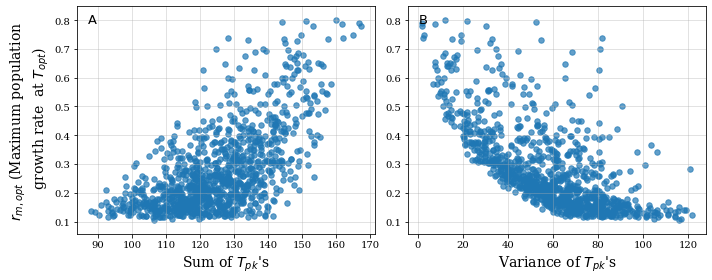

In [299]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title('A', fontsize=13, x=.05, y=.9,**csfont) 
ax.scatter(T_pk_sums,r_opt_vec, s=30, alpha=.7)
ax.set_xlabel(r"Sum of $T_{pk}$'s", fontsize=14); 
ax.set_ylabel('$r_{m,opt}$ (Maximum population \n growth rate  at $T_{opt}$)', fontsize=14);

ax = fig.add_subplot(122)
ax.set_title('B', fontsize=13, x=.05, y=.9,**csfont); 
ax.scatter(T_pk_vars,r_opt_vec, s=30, alpha=.7)
ax.set_xlabel(r"Variance of $T_{pk}$'s", fontsize=14);

fig.tight_layout()

plt.savefig('../results/TherMM_grad.pdf')

## Sensitivity of the results to the parametrisation of fecundity loss rate ($\kappa$)

Fecundity often declines over time. This decline can have substantial impacts on the lifetime reproduction of individuals and therefore fitness. The rate at which fecundity declines with age may be temperature dependent, but there is little exisiting research into the impact of temperature on decline in fecundity in arthropods.

In the absence of strong evidence for the thermal sensitivity of loss of fecundity, or a unimodal relationship between temperature and rate of loss of fecundity, we assess the sensitivity of the model to changes in the parametrisation of rate of loss of fecundity ($\kappa$). We evalauate the model across a broad range of values, including no loss of fecundity with age ($\kappa = 0$).

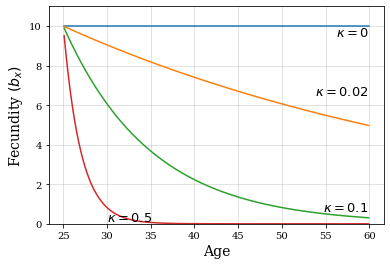

In [36]:
fig = plt.figure(); ax = fig.add_subplot(111)
#b_x_vec = np.array([b_x.evalf(subs = {b_max:b_max_par, x:age, alpha:alp_par, kappa:kap_par}) for age in x_vec])#use lambidy to speed up
b_x_lam = lambdify((b_max, kappa, alpha, x), b_x, np)
b_x_vec = b_x_lam(b_max_par, 0, alp_par, x_vec[x_vec>alp_par])

kap_range = [0,0.02,0.1,0.5]

ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[0], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 10, r'$\kappa = 0$', horizontalalignment = "right", verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[1], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 7, r'$\kappa = 0.02$', horizontalalignment = "right", verticalalignment = "top", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[2], alp_par, x_vec[x_vec>alp_par]));
ax.text(max(x_vec), 0.5, r'$\kappa = 0.1$', horizontalalignment = "right", verticalalignment = "bottom", fontsize = 13);
ax.plot(x_vec[x_vec>alp_par], b_x_lam(b_max_par, kap_range[3], alp_par, x_vec[x_vec>alp_par]));
ax.text(30, 0, r'$\kappa = 0.5$', horizontalalignment = "left", verticalalignment = "bottom", fontsize = 13);
ax.set_xlabel('Age', fontsize=14);
ax.set_ylim([0,b_max_par*1.1]);
ax.set_ylabel('Fecundity $(b_x)$', fontsize=14)
plt.savefig('../results/kappa_plot.pdf')

In order to the assess the uncertainty in the rate of loss of fecundity ($\kappa$), we can evaluate the model with extreme parameter values of $\kappa$. We did this increasing and decreasing the normalisation constant for $\kappa$ ($\kappa_0$) by a factor of five, resulting in TPCs with values five times greater than and a fifth less than the TPC for $\kappa$ above.

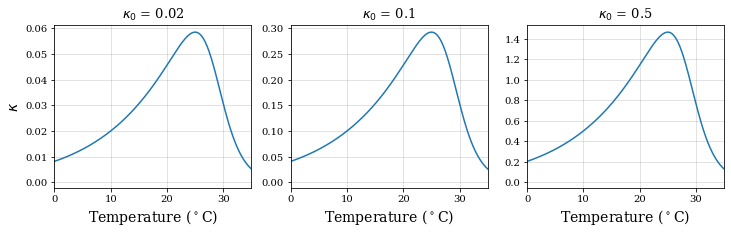

In [37]:
kap_vec_high = B_lam(0.5,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_low = B_lam(0.02,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(131)

ax.plot(T_vec-273.15, kap_vec_low);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.set_title(r'$\kappa_0$ = ' + str(0.02), fontsize=13) 

ax = fig.add_subplot(132)

ax.plot(T_vec-273.15, kap_vec);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
#ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.set_title(r'$\kappa_0$ = ' + str(0.1), fontsize=13) 

ax = fig.add_subplot(133)

ax.plot(T_vec-273.15, kap_vec_high);
ax.set_xlim([0,35])
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
#ax.set_ylabel(r'$\kappa$', fontsize=14)
ax.set_title(r'$\kappa_0$ = ' + str(0.5), fontsize=13) ;

These new TPCs for $\kappa$ were used to evaluate the model across a range of thermal mismatches between adult and juvenile life history traits as above.

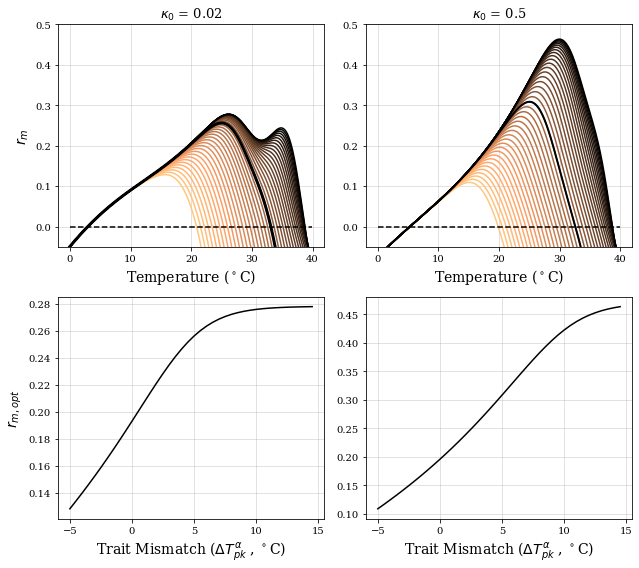

In [86]:
fig = plt.figure(figsize=(9, 8))

ax = fig.add_subplot(221)
ax.set_title(r'$\kappa_0$ = ' + str(0.02), fontsize=13) 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_m$', fontsize=14);

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec_low, alp_vec)

r_opt_vec = ["NA"]*len(T_pk_mm)

colormap = plt.cm.copper_r 
ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):
    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec,zJ_mm_tmp_vec, z_vec, kap_vec_low, alp_mm_tmp_vec)
    r_opt_vec[i] = max(r_mm_tmp_vec)
        
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'black', linewidth = 3)
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--")
plt.ylim(-0.05,0.5)

ax = fig.add_subplot(223)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black');
ax.set_xlabel(r'Trait Mismatch ($\Delta T_{pk}^\alpha$ , $^\circ$C)', fontsize=14); 
ax.set_ylabel('$r_{m, opt}$', fontsize=14)

ax = fig.add_subplot(222)
ax.set_title(r'$\kappa_0$ = ' + str(0.5), fontsize=13) 
ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=14); 

r_m_vec = r_SP_app_lam(bmax_vec, zJ_vec, z_vec, kap_vec_high, alp_vec)

r_opt_vec = ["NA"]*len(T_pk_mm)

ax.set_prop_cycle('color',[colormap(i) for i in np.linspace(0, 1, len(T_pk_mm))])

for i in range(len(T_pk_mm)):

    alp_mm_tmp_vec = B_inv_lam(B_0_alp,E_alp,T_pk_mm[i]+273.15,T_ref_mm,E_D_alp,k_par,T_vec)
    zJ_mm_tmp_vec = B_inv_lam(B_0_zJ,E_zJ,T_pk_mm[i]+273.15,T_ref_mm,E_D_zJ,k_par,T_vec)
    
    r_mm_tmp_vec = r_SP_app_lam(bmax_vec,zJ_mm_tmp_vec, z_vec, kap_vec_high, alp_mm_tmp_vec)
        
    r_opt_vec[i] = max(r_mm_tmp_vec)
    
    ax.plot(T_vec-273.15, r_mm_tmp_vec)

ax.plot(T_vec-273.15, r_m_vec, 'black', linewidth = 2);
ax.plot(T_vec-273.15, [0]*len(T_vec), "k--");
plt.ylim(-0.05,0.5)

ax = fig.add_subplot(224)
ax.plot(T_pk_mm - T_pk_par, r_opt_vec, 'black');
ax.set_xlabel(r'Trait Mismatch ($\Delta T_{pk}^\alpha$ , $^\circ$C)', fontsize=14); 

fig.tight_layout()

In [82]:
kap_vec_low = B_lam(0.02,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
kap_vec_high = B_lam(0.5,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_vec_low = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec_low)
dr_dkap_vec_high = dr_dkap_lam(bmax_vec, alp_vec, z_vec, zJ_vec, kap_vec_high)

dkap_dT_vec_low =  dkap_dT_lam(0.02,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)
dkap_dT_vec_high =  dkap_dT_lam(0.5,E_kap,T_pk_kap+273.15,T_ref_par,E_D_kap,k_par,T_vec)

dr_dkap_dT_vec_low = dr_dkap_vec_low * dkap_dT_vec_low
dr_dkap_dT_vec_high = dr_dkap_vec_high * dkap_dT_vec_low

dr_dT_vec_low = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_low
dr_dT_A_vec_low = dr_dbmax_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_low

dr_dT_vec_high = dr_dbmax_dT_vec + dr_dalp_dT_vec + dr_dz_dT_vec + dr_dzJ_dT_vec + dr_dkap_dT_vec_high
dr_dT_A_vec_high = dr_dbmax_dT_vec + dr_dz_dT_vec + dr_dkap_dT_vec_high

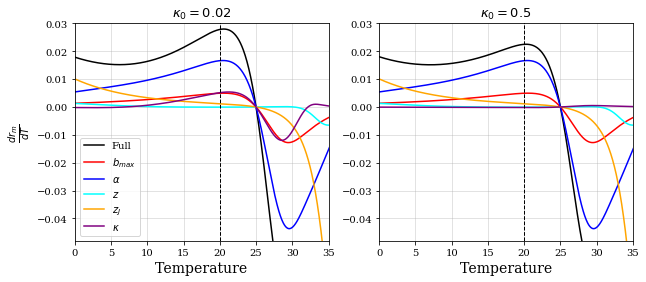

In [83]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)
ax.set_title(r'$\kappa_0 = 0.02$', fontsize=13) 
ax.plot(T_vec-273.15,dr_dT_vec_low, 'black',linewidth=1.5)
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_low, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.048,0.03])
ax.set_xlabel('Temperature', fontsize=14); 
ax.set_ylabel(r'$\frac{dr_m}{dT}$', fontsize=14);
plt.legend(['Full', '$b_{max}$', r'$\alpha$', '$z$', '$z_J$', r'$\kappa$'], loc='lower left') #Add kappa to legend if included in analysis

ax = fig.add_subplot(122)
ax.set_title(r'$\kappa_0 = 0.5$', fontsize=13) 
ax.plot(T_vec-273.15,dr_dT_vec_high, 'black',linewidth=1.5)
ax.plot(T_vec-273.15,dr_dbmax_dT_vec, 'red')
ax.plot(T_vec-273.15,dr_dalp_dT_vec, 'blue')
ax.plot(T_vec-273.15,dr_dz_dT_vec, 'cyan')
ax.plot(T_vec-273.15,dr_dzJ_dT_vec, 'orange')
ax.plot(T_vec-273.15,dr_dkap_dT_vec_high, 'purple')
ax.plot([T_pk_par, T_pk_par], [ax.get_ylim()[0],ax.get_ylim()[1]], color='k', linestyle='--', linewidth=1)
ax.set_xlim([0,35])
ax.set_ylim([-0.048,0.03])
ax.set_xlabel('Temperature', fontsize=14); 

plt.savefig('../results/r_sens_kap.pdf')